In [1]:
%matplotlib inline
from pylab import *
import cv2
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

In [2]:
rcParams['figure.figsize'] = 10, 10

In [3]:
from dataset import load_image

In [4]:
import torch

In [5]:
from utils import cuda

In [6]:
from generate_masks import get_model

In [7]:
from albumentations import Compose, Normalize

In [8]:
from albumentations.pytorch.functional import img_to_tensor

In [9]:
def img_transform(p=1):
    return Compose([
        Normalize(p=1)
    ], p=p)


In [10]:
def mask_overlay(image, mask, color=(0, 255, 0)):
    """
    Helper function to visualize mask on the top of the car
    """
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.uint8)
    weighted_sum = cv2.addWeighted(mask, 0.5, image, 0.5, 0.)
    img = image.copy()
    ind = mask[:, :, 1] > 0    
    img[ind] = weighted_sum[ind]    
    return img

In [11]:
model_path = 'runs/debug/model_0.pt'
model = get_model(model_path, model_type='TernausNetV2', problem_type='parts')

In [23]:
#img_file_name = 'data/cropped_train/instrument_dataset_3/images/frame004.jpg'
img_file_name = 'data/testing/instrument_dataset_3/right_frames/frame295.png'
#gt_file_name = 'data/cropped_train/instrument_dataset_3/binary_masks/frame004.png'

In [25]:
image = load_image(img_file_name)
#gt = cv2.imread(gt_file_name, 0) > 0

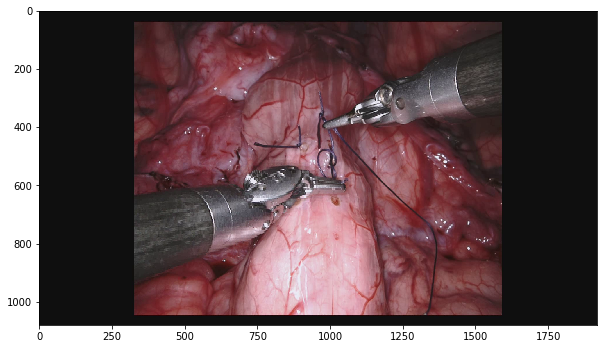

In [26]:
imshow(image)

In [27]:
#CUDA_VISIBLE_DEVICES=1,2
with torch.no_grad():
    input_image = torch.unsqueeze(img_to_tensor(img_transform(p=1)(image=image)['image']).cuda(), dim=0)

In [28]:
mask = model(input_image)

RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 1. Got 67 and 66 in dimension 2 at /pytorch/aten/src/THC/generic/THCTensorMath.cu:71

In [ ]:
mask_array = mask.data[0].cpu().numpy()[0]

In [ ]:
#imshow(mask_array > 0)
plt.figure()
plt.imshow(torch.exp(mask.data[0,1,:]).detach().cpu())  # plot class1
plt.figure()
plt.imshow(torch.exp(mask.data[0,2,:,:]).detach().cpu())  # plot class2
plt.figure()
plt.imshow(torch.exp(mask.data[0,3,:,:]).detach().cpu())  # plot class3

In [ ]:
imshow(mask_overlay(image, (torch.exp(mask.data[0,2,:]).detach().cpu())))